In [1]:
from vectors import scale
from teapot import load_triangles
from draw_model import draw_model
from vectors import *
from math import *
from draw2d import *

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def transform(v):
    old_x,old_y,old_z=v
    # 此处做一些计算
    return (new_x,new_y,new_z)

In [3]:
def scale2(v):
    return scale(2.0,v)

In [4]:
original_triangles=load_triangles()
scaled_triangles=[
    [scale2(vertex) for vertex in triangle]
    for triangle in original_triangles
]

In [5]:
# draw_model(scaled_triangles)

In [6]:
def translate1left(v):
    return add((-1,0,0),v)

In [7]:
scaled_translated_triangles=[
    [translate1left(scale2(vertex)) for vertex in triangle]
    for triangle in original_triangles
]
# draw_model(scaled_translated_triangles)

In [8]:
def scale2_then_translate1left(v):
    return translate1left(scale2(v))

In [9]:
def compose(f1,f2):
    def new_function(input):
        return f1(f2(input))
    return new_function

In [10]:
scale2_then_translate1left=compose(translate1left,scale2)

In [11]:
test_compose=[
    [scale2_then_translate1left(vertex) for vertex in triangle]
    for triangle in original_triangles
]

In [12]:
# draw_model(test_compose)

In [13]:
def polygon_map(transformation,polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

In [14]:
# draw_model(polygon_map(scale2,load_triangles()))

In [15]:
test_polygon_map=polygon_map(compose(translate1left,scale2),original_triangles)

In [16]:
# draw_model(test_polygon_map)

In [17]:
def scale_by(scaler):
    def new_function(v):
        return scale(scaler,v)
    return new_function

In [18]:
def add_by(adder):
    def new_function(v):
        return add(adder,v)
    return new_function

In [19]:
def translate_by(translation):
    def new_function(v):
        return add(translation,v)
    return new_function

In [20]:
# draw_model(polygon_map(compose(addd_by((-1,0,0)),scale_by(2)),original_triangles))

In [21]:
def rotate2d(angle,vector):
    l,a=to_polar(vector)
    return to_cartesian((1,a+angle))

In [22]:
def rotate_z(angle,vector):
    x,y,z=vector
    new_x,new_y=rotate2d(angle,(x,y))
    return new_x,new_y,z

In [23]:
def rotate_z_by(angle):
    def new_function(v):
        return rotate_z(angle,v)
    return new_function

In [24]:
# draw_model(polygon_map(rotate_z_by(pi/4.),load_triangles()))

In [25]:
def rotate_x(angle,vector):
    x,y,z=vector
    new_y,new_z=rotate2d(angle,(y,z))
    return x,new_y,new_z
def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

In [26]:
# draw_model(polygon_map(rotate_x_by(pi/2.),load_triangles()))

In [27]:
def strach_x(vector):
    x,y,z=vector
    return (4.*x,y,z)

In [28]:
# draw_model(polygon_map(strach_x,load_triangles()))

In [29]:
# draw_model(polygon_map(strach_x,original_triangles))

In [30]:
def strach_y(vector):
    x,y,z=vector
    return (x,4.*y,z)

In [31]:
# draw_model(polygon_map(strach_y,load_triangles()))

In [32]:
def cube_strach_y(vector):
    x,y,z=vector
    return (x,y*y*y,z)

In [33]:
# draw_model(polygon_map(cube_strach_y,load_triangles()))

In [34]:
def slant_xy(vector):
    x,y,z=vector
    return (x+y,y,z)

In [35]:
# draw_model(polygon_map(slant_xy,load_triangles()))

In [36]:
def translate_by(translation):
    def new_function(v):
        return add(translation,v)
    return new_function

In [37]:
# draw_model(polygon_map(translate_by((0,0,-20)),original_triangles))

In [38]:
# draw_model(polygon_map(scale_by(0.5),original_triangles))

In [39]:
# draw_model(polygon_map(scale_by(-1),original_triangles))

In [40]:
# draw_model(polygon_map(compose(scale2,translate1left),load_triangles()))

In [41]:
# draw_model(polygon_map(compose(translate1left,scale2),load_triangles()))

In [42]:
# draw_model(polygon_map(compose(scale_by(0.4),scale_by(1.5)),load_triangles()))

In [43]:
def compose(*args):
    def new_function(input):
        state=input
        for f in reversed(args):
            state=f(state)
        return state
    return new_function

In [44]:
def prepend(string):
    def new_function(input):
        return string+input
    return new_function
f=compose(prepend('P'),prepend('y'),prepend('t'))
print(f('hon'))

Python


In [45]:
def curry2(f):
    def g(x):
        def new_function(y):
            return f(x,y)
        return new_function
    return g

In [46]:
scale_by=curry2(scale)
scale_by(2)((1,2,3))

(2, 4, 6)

In [47]:
# draw_model(polygon_map(compose(rotate_z_by(pi/2.),rotate_x_by(pi/2.)),load_triangles()))

In [48]:
def rotate_y(angle,vector):
    x,y,z=vector
    new_x,new_z=rotate2d(angle,(x,z))
    return new_x,y,new_z
def rotate_y_by(angle):
    def new_function(v):
        return rotate_y(angle,v)
    return new_function

In [49]:
# draw_model(polygon_map(rotate_y_by(pi/2.),load_triangles()))

In [50]:
# draw_model(polygon_map(compose(rotate_z_by(pi/2.),rotate_x_by(pi/2.)),load_triangles()))

In [51]:
# draw_model(polygon_map(rotate_y_by(-pi/2.),load_triangles()))

In [52]:
# draw_model(polygon_map(compose(rotate_x_by(pi/2.),rotate_z_by(pi/2.)),load_triangles()))

In [53]:
def strech_x(scaler,vector):
    x,y,z=vector
    return (scaler*x,y,z)

def strech_x_by(scaler):
    def new_function(vector):
        return strech_x(scaler,vector)
    return new_function

In [54]:
strech_x(2,(1,2,3))

(2, 2, 3)

In [55]:
strech_x_by(2)((1,2,3))

(2, 2, 3)

In [56]:
Ae1=(1,1,1)
Ae2=(1,0,-1)
Ae3=(0,1,1)

def apply_A(v):
    return add(
        scale(v[0],Ae1),
        scale(v[1],Ae2),
        scale(v[2],Ae3),
    )

# draw_model(polygon_map(apply_A,load_triangles()))

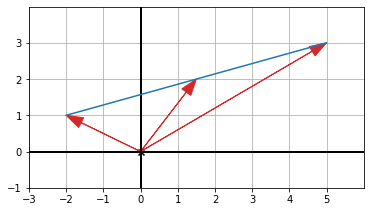

In [57]:
u=(5,3)
v=(-2,1)
u_v_half=add(scale(0.5,u),scale(0.5,v))
draw2d(
    Arrow2D(v),
    Arrow2D(u),
    Arrow2D(u_v_half),
    Segment2D(u,v,color=blue)
)

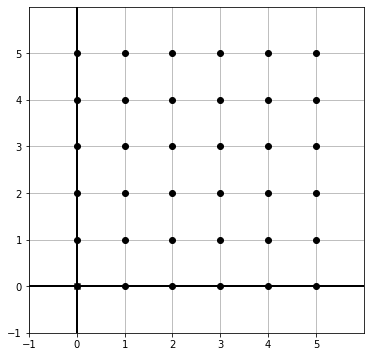

In [58]:
v_all=[Points2D((x,y)) for x in range(6) for y in range(6)]
draw2d(
    *v_all
)

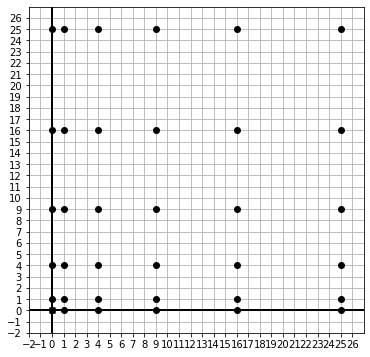

In [59]:
v_S_all=[Points2D((x**2,y**2)) for x in range(6) for y in range(6)]
draw2d(
    *v_S_all
)

In [60]:
def linear_combination(scalers,*vectors):
    scaled=[scale(s,v) for s,v in zip(scalers,vectors)]
    return add(*scaled)

In [61]:
linear_combination([1,2,3],(1,0,0),(0,1,0),(0,0,1))

(1, 2, 3)

In [62]:
def transform_standard_basis(transform):
    return transform((1,0,0)),transform((0,1,0)),transform((0,0,1))

In [63]:
transform_standard_basis(rotate_x_by(pi/2))

((1, 6.123233995736766e-17, 1.0),
 (0, 6.123233995736766e-17, 1.0),
 (0, -1.0, 1.2246467991473532e-16))

In [65]:
linear_combination([-1,1,2],(0,0,1),(2,1,0),(-1,0,-1))

(0, 1, -3)

In [66]:
linear_combination([0,0,1],(1,1,1),(1,0,-1),(0,1,1))

(0, 1, 1)

In [67]:
linear_combination([2,1,0],(1,1,1),(1,0,-1),(0,1,1))

(3, 2, 1)

In [68]:
linear_combination([-1,0,-1],(1,1,1),(1,0,-1),(0,1,1))

(-1, -2, -2)